<a href="https://colab.research.google.com/github/robledoirismar230-stack/Proyecto-Dashboard-Completo/blob/README/music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Music

In [ ]:
import pandas as pd
ad = pd.read_csv("music.csv")
print(ad.head())

   artist.familiarity  artist.hotttnesss           artist.id  artist.latitude  \
0            0.581794           0.401998  ARD7TVE1187B99BFB1          0.00000   
1            0.630630           0.417500  ARMJAGH1187FB546F3         35.14968   
2            0.487357           0.343428  ARKRRTF1187B9984DA          0.00000   
3            0.630382           0.454231  AR7G5I41187FB4CE6C          0.00000   
4            0.651046           0.401724  ARXR32B1187FB57099          0.00000   

   artist.location  artist.longitude       artist.name  artist.similar  \
0                0           0.00000            Casual             0.0   
1                0         -90.04892      The Box Tops             0.0   
2                0           0.00000  Sonora Santanera             0.0   
3                0           0.00000          Adam Ant             0.0   
4                0           0.00000               Gob             0.0   

     artist.terms  artist.terms_freq  ...  song.mode  song.mode_conf

In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   artist.familiarity              10000 non-null  float64
 1   artist.hotttnesss               10000 non-null  float64
 2   artist.id                       10000 non-null  object 
 3   artist.latitude                 10000 non-null  float64
 4   artist.location                 10000 non-null  int64  
 5   artist.longitude                10000 non-null  float64
 6   artist.name                     10000 non-null  object 
 7   artist.similar                  10000 non-null  float64
 8   artist.terms                    9995 non-null   object 
 9   artist.terms_freq               10000 non-null  float64
 10  release.id                      10000 non-null  int64  
 11  release.name                    10000 non-null  int64  
 12  song.artist_mbtags              1

In [ ]:
rapidas = ad[ad["song.tempo"] >= 120]
print(rapidas[["artist.name", "song.tempo", "song.year"]].head())


              artist.name  song.tempo  song.year
1            The Box Tops     121.274       1969
4                     Gob     129.738       2007
5   Jeff And Sheri Easter     147.782          0
10           JennyAnyKind     146.765          0
12              Andy Andy     130.040          0


In [ ]:
modernas = ad[ad["song.year"] >= 2000]
print(modernas[["artist.name", "song.year", "song.tempo"]].head())

                  artist.name  song.year  song.tempo
4                         Gob       2007     129.738
18                      Tesla       2004     150.062
23  The Dillinger Escape Plan       2004     166.862
27                 Tim Wilson       2005      90.022
40          Scarlet's Remains       2007     115.061


In [ ]:
pop = ad[ad["artist.terms"].str.contains("pop", case=False, na=False)]
print(pop[["artist.name", "artist.terms"]].head())


          artist.name artist.terms
3            Adam Ant     pop rock
4                 Gob     pop punk
24       SUE THOMPSON     pop rock
37      Despina Vandi    dance pop
72  Heavy D / McGruff      pop rap


   artist.familiarity  artist.hotttnesss           artist.id  artist.latitude  \
0            0.581794           0.401998  ARD7TVE1187B99BFB1          0.00000   
1            0.630630           0.417500  ARMJAGH1187FB546F3         35.14968   
2            0.487357           0.343428  ARKRRTF1187B9984DA          0.00000   
3            0.630382           0.454231  AR7G5I41187FB4CE6C          0.00000   
4            0.651046           0.401724  ARXR32B1187FB57099          0.00000   

   artist.location  artist.longitude       artist.name  artist.similar  \
0                0           0.00000            Casual             0.0   
1                0         -90.04892      The Box Tops             0.0   
2                0           0.00000  Sonora Santanera             0.0   
3                0           0.00000          Adam Ant             0.0   
4                0           0.00000               Gob             0.0   

     artist.terms  artist.terms_freq  ...  song.mode  song.mode_conf

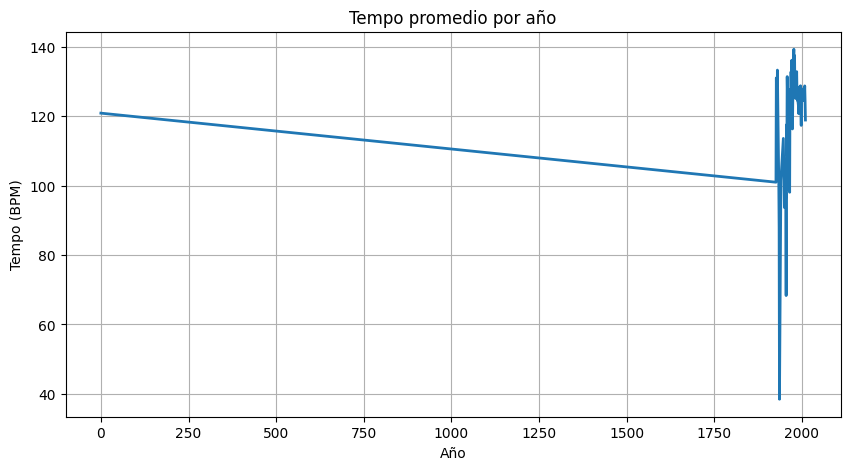

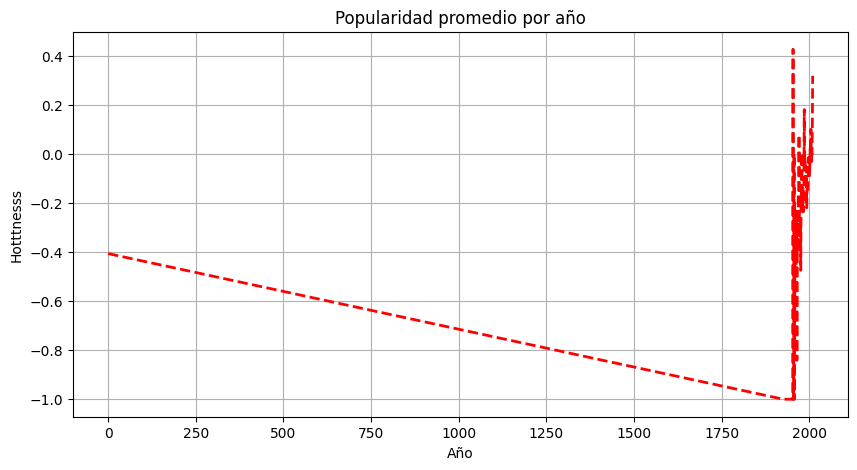

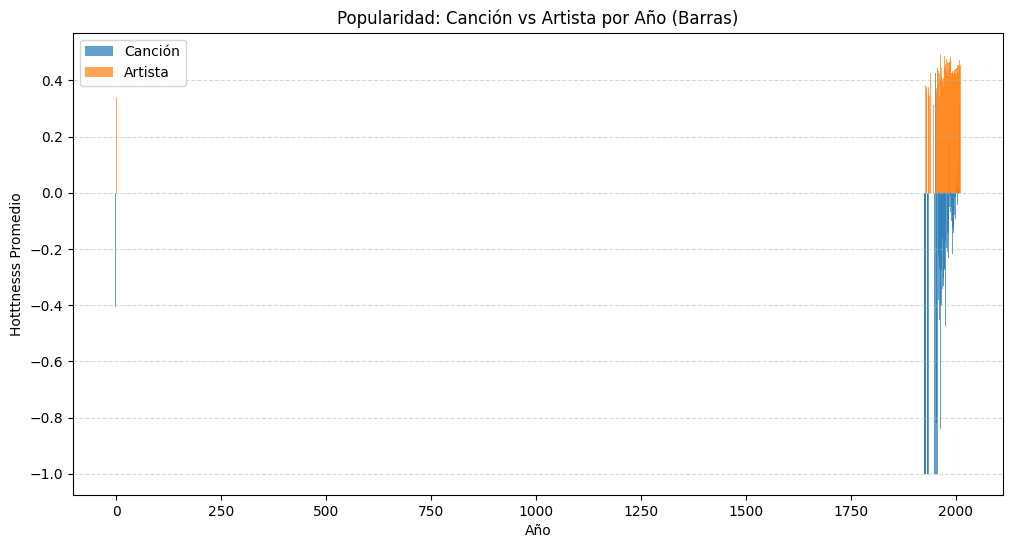

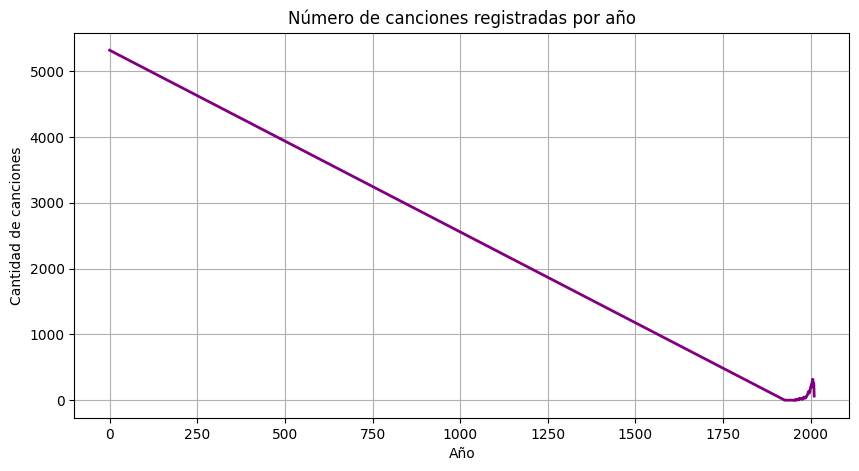

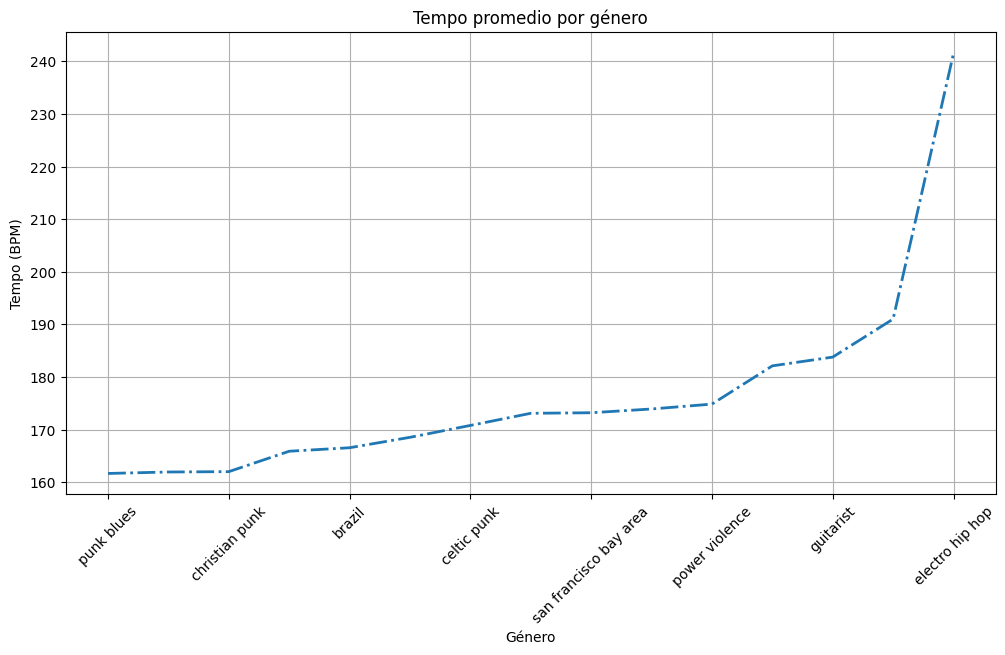

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

#   CARGA Y LIMPIEZA DEL DATASET

ad = pd.read_csv("music.csv")
ad = ad.dropna(subset=["song.year", "song.tempo", "song.hotttnesss", "artist.hotttnesss"])

# Mostrar info
print(ad.head())
ad.info()

# Crear columna de género
ad["genre"] = ad["artist.terms"].str.split(",").str[0]

#   GRÁFICO 1 — Tempo promedio por año

tempo_year = ad.groupby("song.year")["song.tempo"].mean()

plt.figure(figsize=(10,5))
tempo_year.plot(kind="line", linewidth=2)
plt.title("Tempo promedio por año")
plt.xlabel("Año")
plt.ylabel("Tempo (BPM)")
plt.grid(True)
plt.savefig("grafico1_tempo_por_año.png", dpi=300)
plt.show()


#   GRÁFICO 2 — Popularidad promedio por año

pop_year = ad.groupby("song.year")["song.hotttnesss"].mean()

plt.figure(figsize=(10,5))
pop_year.plot(kind="line", color="red", linestyle="--", linewidth=2)
plt.title("Popularidad promedio por año")
plt.xlabel("Año")
plt.ylabel("Hotttnesss")
plt.grid(True)
plt.savefig("grafico2_popularidad_por_año.png", dpi=300)
plt.show()


#   GRÁFICO 3 — Comparación

pop_cancion = ad.groupby("song.year")["song.hotttnesss"].mean()
pop_artista = ad.groupby("song.year")["artist.hotttnesss"].mean()

years = pop_cancion.index

plt.figure(figsize=(12,6))

# Ancho de barra
w = 2

plt.bar(years - w/2, pop_cancion, width=w, label="Canción", alpha=0.7)
plt.bar(years + w/2, pop_artista, width=w, label="Artista", alpha=0.7)

plt.title("Popularidad: Canción vs Artista por Año (Barras)")
plt.xlabel("Año")
plt.ylabel("Hotttnesss Promedio")
plt.legend()
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.savefig("grafico3_comparacion_popularidad_BARRAS.png", dpi=300)
plt.show()


#   GRÁFICO 4 — Cantidad de canciones por año

songs_year = ad["song.year"].value_counts().sort_index()

plt.figure(figsize=(10,5))
songs_year.plot(kind="line", color="purple", linewidth=2)
plt.title("Número de canciones registradas por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de canciones")
plt.grid(True)
plt.savefig("grafico4_canciones_por_año.png", dpi=300)
plt.show()

#   GRÁFICO 5 — Tiempo promedio por género

genre_tempo = ad.groupby("genre")["song.tempo"].mean().sort_values().tail(15)

plt.figure(figsize=(12,6))
genre_tempo.plot(kind="line", linestyle="-.", linewidth=2)
plt.title("Tempo promedio por género")
plt.xlabel("Género")
plt.ylabel("Tempo (BPM)")
plt.grid(True)
plt.xticks(rotation=45)
plt.savefig("grafico5_tempo_por_genero.png", dpi=300)
plt.show()
